In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Leyendo los datos

In [140]:
df = pd.read_csv('data/Pokemon.csv')

### Primeras inspecciones de datos

In [141]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [143]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


### Transformación de columnas

In [144]:
# Eliminamos variantes de pokemones como formas alternas o mega evoluciones 
df.columns = df.columns.str.strip()

formas_alternas = [
    'Mega', 'Primal', 'Attack', 'Defense', 'Speed', 'Sky', 'Land', 'Origin', 
    'Altered', 'Sandy', 'Trash', 'Therian', 'Black', 'White', 'Resolute', 
    'Pirouette', 'Ash', 'Alola', 'Galar', 'Hisuian', 'Paldea', 'Paldean', 'Totem', 'Forme',
    'Cosplay', 'Starter', 'Partner', 'Eternal', 'Crowned', 'Gmax', 'Ultra', 'Dusk', 'Dawn', 'Midnight', 'Midday', 'School', 'Busted', 'Unbound', 'Small', 'Large', 'Super', 'Average', 'East', 'West', 'Heat', 'Wash', 'Frost', 'Fan', 'Mow', 'Origin', 'Attack', 'Defence', 'Speed', 'Sunshine', 'Rainy', 'Snowy', 'Sandy', 'Trash', 'Therian', 'Incarnate', 'Resolute', 'Pirouette', 'Black', 'White', 'Active', 'Complete', '50%', '10%', 'School', 'Solo', 'Baile', 'Pom-Pom', 'Pa’u', 'Sensu'
]

mask = ~df['Name'].str.contains('|'.join(formas_alternas), case=False, regex=True)
df = df[mask].copy()

df = df.drop_duplicates(subset='Name', keep='first')

df.reset_index(drop=True, inplace=True)

In [145]:
# Pasar datos de la columna Legendaria a númerico
df['Legendary'] = df['Legendary'].astype(int)

In [146]:
# Agregar columna que diga si el pokemon tiene dos tipos
df['HasTwoTypes'] = df['Type 2'].notnull().astype(int)

### Tipos de datos y conteos

In [147]:
# Conteo de Pokemons Legendarios
df['Legendary'].value_counts()

Legendary
0    662
1     38
Name: count, dtype: int64

Generation
1    149
5    149
3    132
4    102
2     99
6     69
Name: count, dtype: int64


Text(0.5, 0, 'Generation')

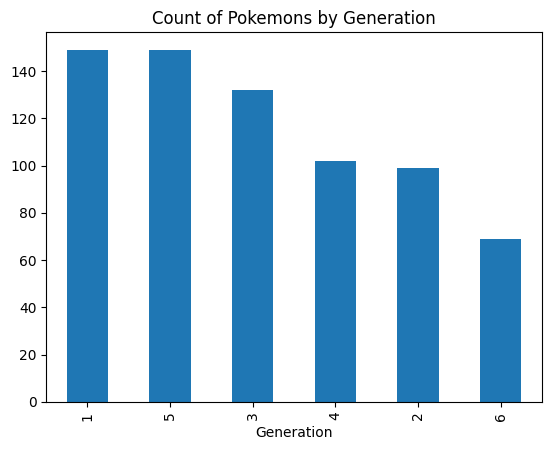

In [148]:
# Conteo de Pokemons por Generación
print(df['Generation'].value_counts())
df['Generation'].value_counts().plot(kind='bar', title='Count of Pokemons by Generation')
plt.xlabel('Generation')

In [160]:
# Creamos nueva columna para juntar tipo 1 y tipo 2
df['Type_combined'] = df['Type 1'] + ' / ' + df['Type 2'].fillna('')
# Conteo de tipos combinados
df['Type_combined'].value_counts()

Type_combined
Normal /            59
Water /             57
Psychic /           31
Grass /             31
Electric /          26
                    ..
Ice / Ghost          1
Electric / Ghost     1
Steel / Dragon       1
Psychic / Fire       1
Fire / Water         1
Name: count, Length: 140, dtype: int64

In [150]:
# De que tipos son los Pokemons Legendarios
legendary_types = df[df['Legendary'] == 1]['Type_combined'].value_counts()
legendary_types

Type_combined
Psychic /            4
Normal /             2
Dragon / Psychic     2
Fire / Flying        2
Water /              2
Psychic / Fire       1
Steel / Fighting     1
Rock / Fighting      1
Grass / Fighting     1
Dragon / Fire        1
Ice / Flying         1
Dragon / Electric    1
Dark /               1
Fairy /              1
Dark / Flying        1
Rock / Fairy         1
Psychic / Ghost      1
Dragon / Ice         1
Steel / Dragon       1
Water / Dragon       1
Electric / Flying    1
Steel / Psychic      1
Dragon / Flying      1
Ground /             1
Steel /              1
Ice /                1
Rock /               1
Psychic / Flying     1
Fire /               1
Electric /           1
Fire / Water         1
Name: count, dtype: int64

### Distribución de Stats

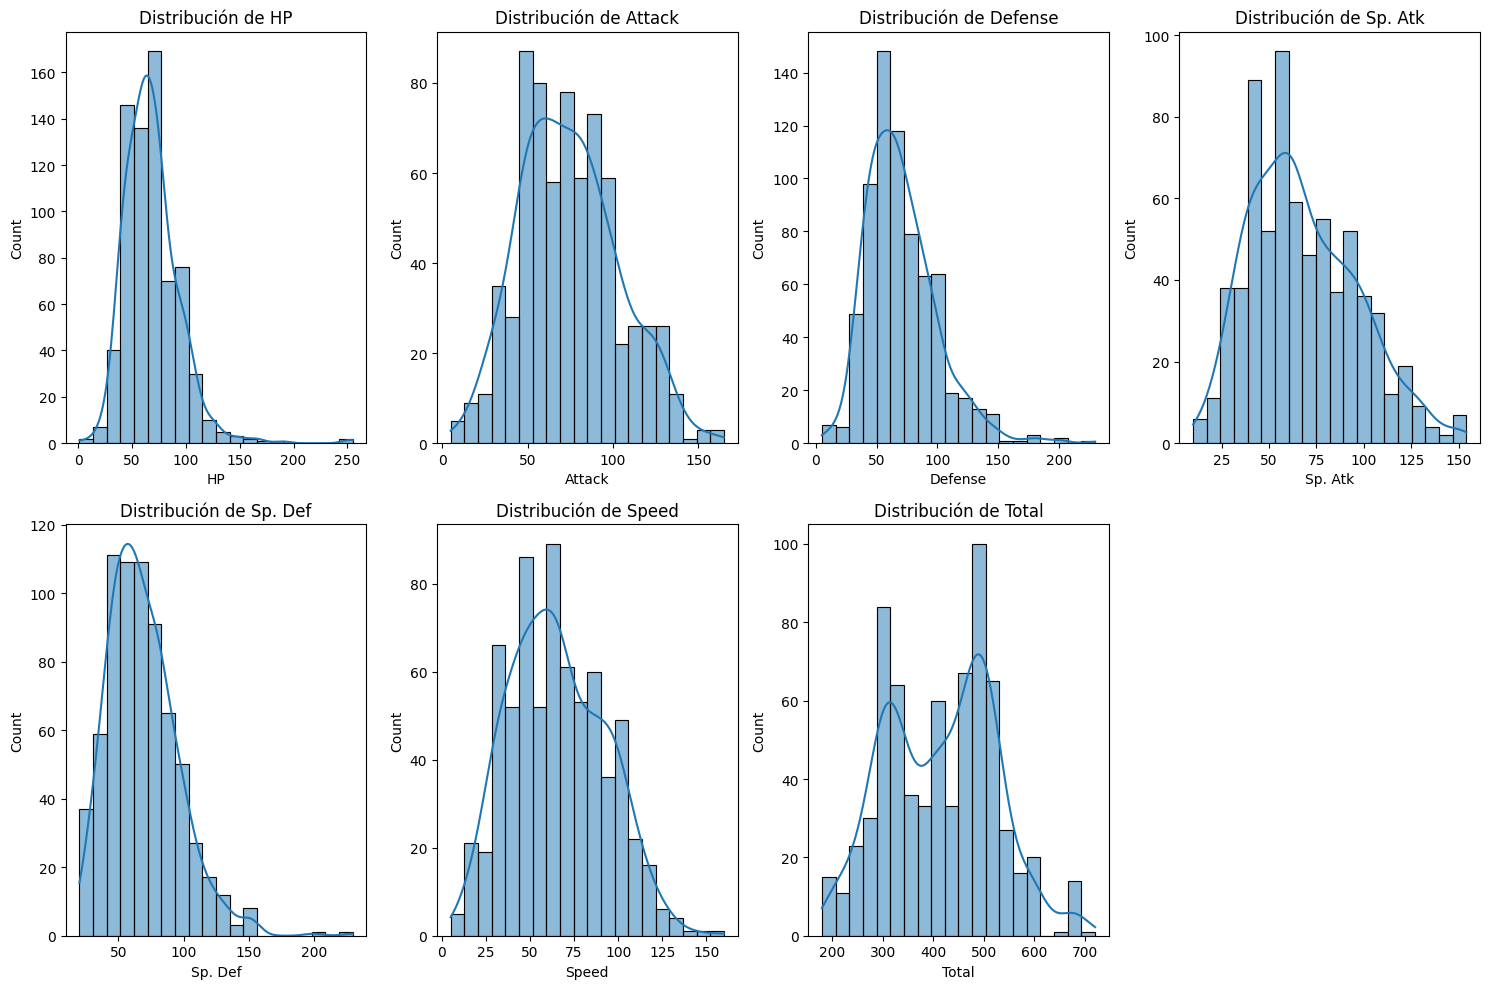

In [151]:
# Histogramas de stats
stats = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Total']
plt.figure(figsize=(15,10))
for i, stat in enumerate(stats):
    plt.subplot(2, 4, i+1)
    sns.histplot(df[stat], bins=20, kde=True)
    plt.title(f'Distribución de {stat}')
plt.tight_layout()
plt.show()


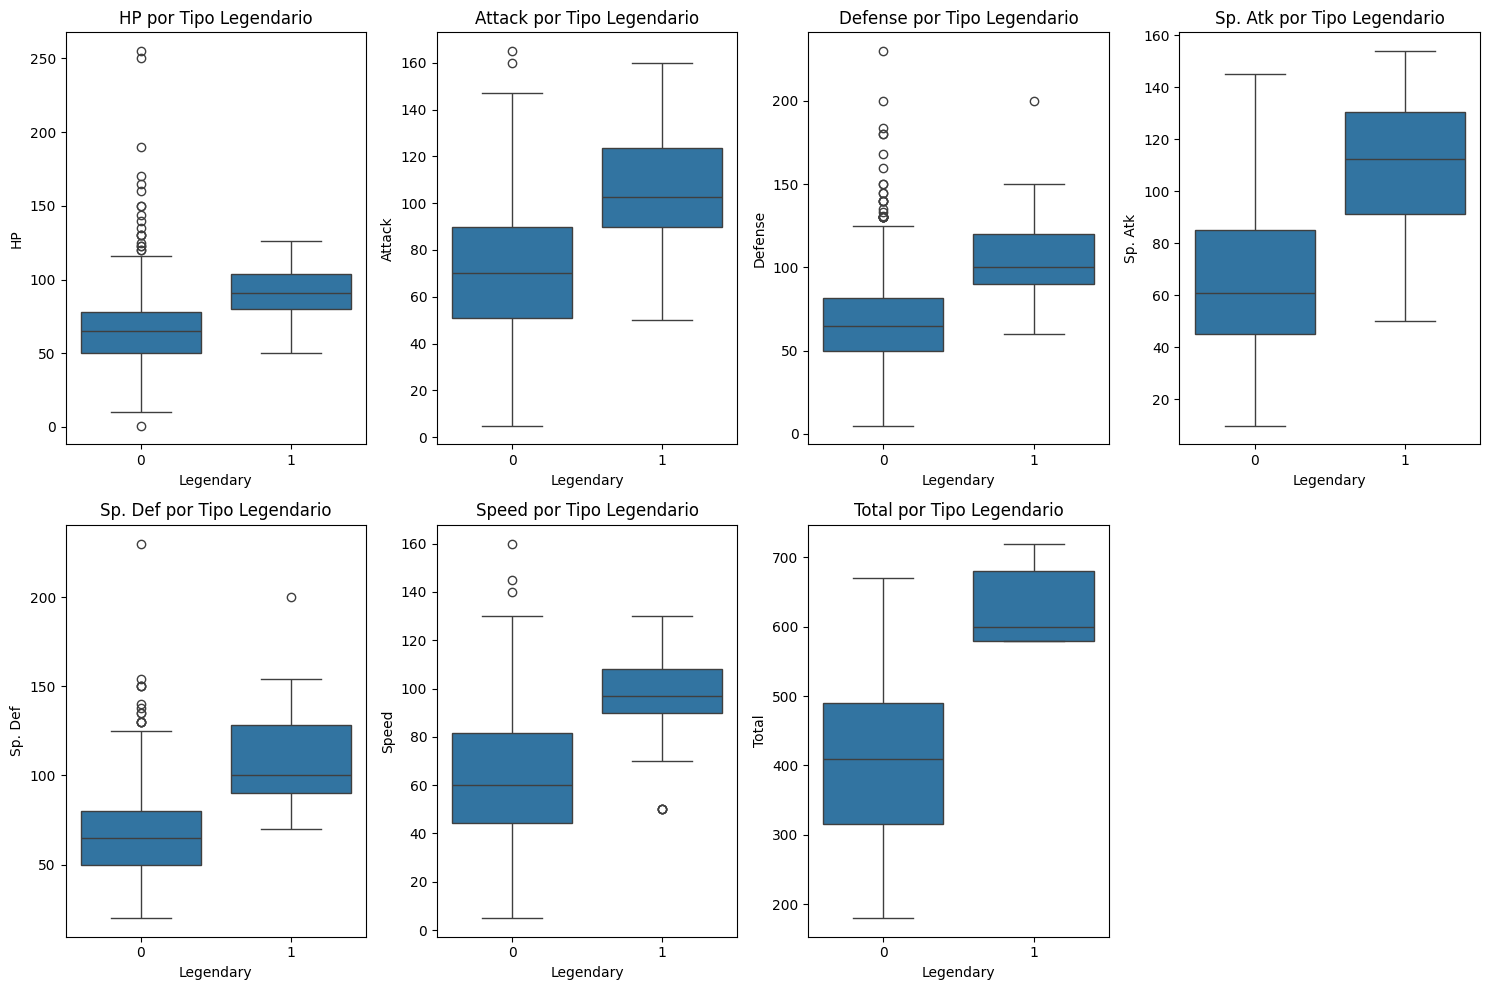

In [152]:
# Boxplots de stats por tipo legendario
plt.figure(figsize=(15,10))
for i, stat in enumerate(stats):
    plt.subplot(2, 4, i+1)
    sns.boxplot(data=df, x='Legendary', y=stat)
    plt.title(f'{stat} por Tipo Legendario')
plt.tight_layout()
plt.show()


### Proporción de legendarios por generación

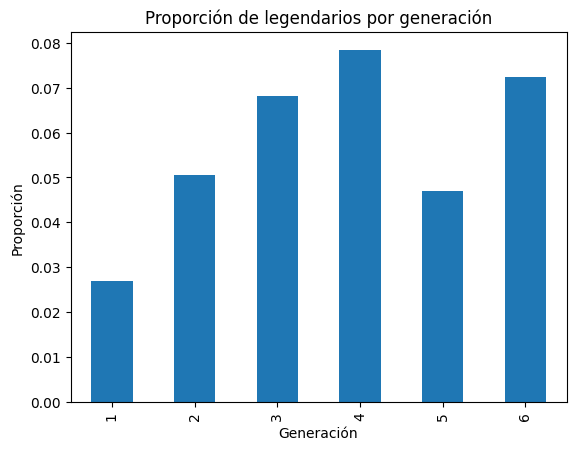

In [153]:
prop_legendary_by_gen = df.groupby('Generation')['Legendary'].mean()
prop_legendary_by_gen.plot(kind='bar')
plt.title('Proporción de legendarios por generación')
plt.ylabel('Proporción')
plt.xlabel('Generación')
plt.show()


### Mapa de correlación entre stats

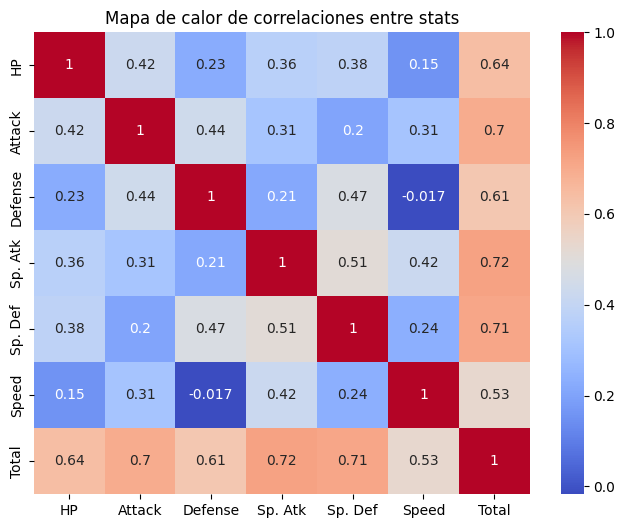

In [154]:
corr = df[stats].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlaciones entre stats')
plt.show()


### Outliers

In [155]:
# Que pokemones tienen los mayores stats
df[['Name','Total','Legendary']].sort_values(by='Total', ascending=False)

,Name,Total,Legendary
481,Arceus,720,1
147,Mewtwo,680,1
474,Dialga,680,1
628,Zekrom,680,1
627,Reshiram,680,1
...,...,...,...
9,Caterpie,195,0
261,Wurmple,195,0
394,Kricketot,194,0
294,Azurill,190,0


In [156]:
# Pokemonos no legendarios con stats muy altos
outliers = df[(df['Total'] > 570) & (df['Legendary'] == 0)]
outliers[['Name', 'Total', 'Type 1', 'Type 2']].sort_values(by='Total', ascending=False)


,Name,Total,Type 1,Type 2
285,Slaking,670,Normal,NaN
146,Dragonite,600,Dragon,Flying
148,Mew,600,Psychic,NaN
244,Tyranitar,600,Rock,Dark
247,Celebi,600,Psychic,Grass
367,Salamence,600,Dragon,Flying
370,Metagross,600,Steel,Psychic
438,Garchomp,600,Dragon,Ground
477,Cresselia,600,Psychic,NaN
479,Manaphy,600,Water,NaN


### Distribucion de tipos duales

In [ ]:
# Cuantos pokemones tienen dos tipos
print(df['HasTwoTypes'].value_counts())


HasTwoTypes
0    361
1    339
Name: count, dtype: int64


In [ ]:
# Proporción de pokemones legendarios con dos tipos
dualtype_legendary = df[df['Legendary'] == 1]['HasTwoTypes'].mean()
dualtype_no_legendary = df[df['Legendary'] == 0]['HasTwoTypes'].mean()
print(f'Proporción legendarios dual type: {dualtype_legendary:.2f}')
print(f'Proporción NO legendarios dual type: {dualtype_no_legendary:.2f}')


Proporción legendarios dual type: 0.58
Proporción NO legendarios dual type: 0.48


In [161]:
# Guardamos el DataFrame final en la carpeta data
df.to_csv('data/Pokemon_cleaned.csv', index=False)

## Conclusiones del Análisis Exploratorio de Datos (EDA) de Pokémon

### 1. Distribución de Pokémon legendarios vs. no legendarios
- El dataset contiene **700 Pokémon**, de los cuales **38 son legendarios** (~5.4%) y **662 no son legendarios**.
- Existe un **fuerte desbalance de clases**, lo que hace recomendable el uso de técnicas de balanceo al entrenar modelos supervisados.

### 2. Distribución de generaciones
- Las generaciones **1 y 5** son las más numerosas (149 Pokémon cada una).
- Las generaciones **2 a 6** tienen menor cantidad de Pokémon, siendo la **sexta generación la menos representada** (69).
- La **proporción de legendarios** es mayor en las generaciones 3, 4 y 6.

### 3. Tipos y combinaciones de tipo
- El tipo más común es **Normal**, seguido de Water, Psychic, Grass y Electric.
- **361 Pokémon** tienen un solo tipo y **339 tienen dos tipos**.
- Los legendarios tienden a tener combinaciones de tipos menos frecuentes, como *Psychic / Fire*, *Steel / Fighting*, *Rock / Fighting*, entre otros.
- El **58% de los legendarios** son dual-type, comparado con el **48% de los no legendarios**.

### 4. Estadísticas base (stats)
- Los stats presentan **distribuciones asimétricas**, con colas hacia valores altos.
- Los legendarios destacan por tener **medianas y rangos superiores en todos los stats**, especialmente en el stat 'Total'.
- Los boxplots muestran que los stats de los legendarios están concentrados en valores altos y con menor dispersión, mientras que los no legendarios tienen mayor variabilidad y outliers.

### 5. Correlación entre stats
- Existe **correlación positiva** moderada entre los diferentes stats.
- El stat 'Total' tiene **alta correlación** con todos los stats individuales, como es de esperarse.

### 6. Outliers y casos especiales
- Los legendarios tienen stats consistentemente altos (Total > 600 en la mayoría).
- Existen **Pokémon no legendarios con stats muy altos** (como Slaking, Dragonite, Tyranitar, Salamence, Metagross, Garchomp).

### 7. Insights adicionales
- Los tipos legendarios más comunes son **Psychic** (solo o combinado), seguido de combinaciones como *Dragon / Psychic* y *Fire / Flying*.
- La dualidad de tipo y la combinación de stats altos son rasgos frecuentes en legendarios, pero no exclusivos.
- No se detectaron valores nulos problemáticos en las columnas analizadas, salvo los tipos secundarios en Pokémon de un solo tipo.

### 8. Recomendaciones para modelado
- Considerar el fuerte desbalance de clases y la presencia de outliers.
- No depender únicamente del stat 'Total', sino explorar el aporte de cada stat individual y otros features como tipo, generación y dualidad de tipo.

